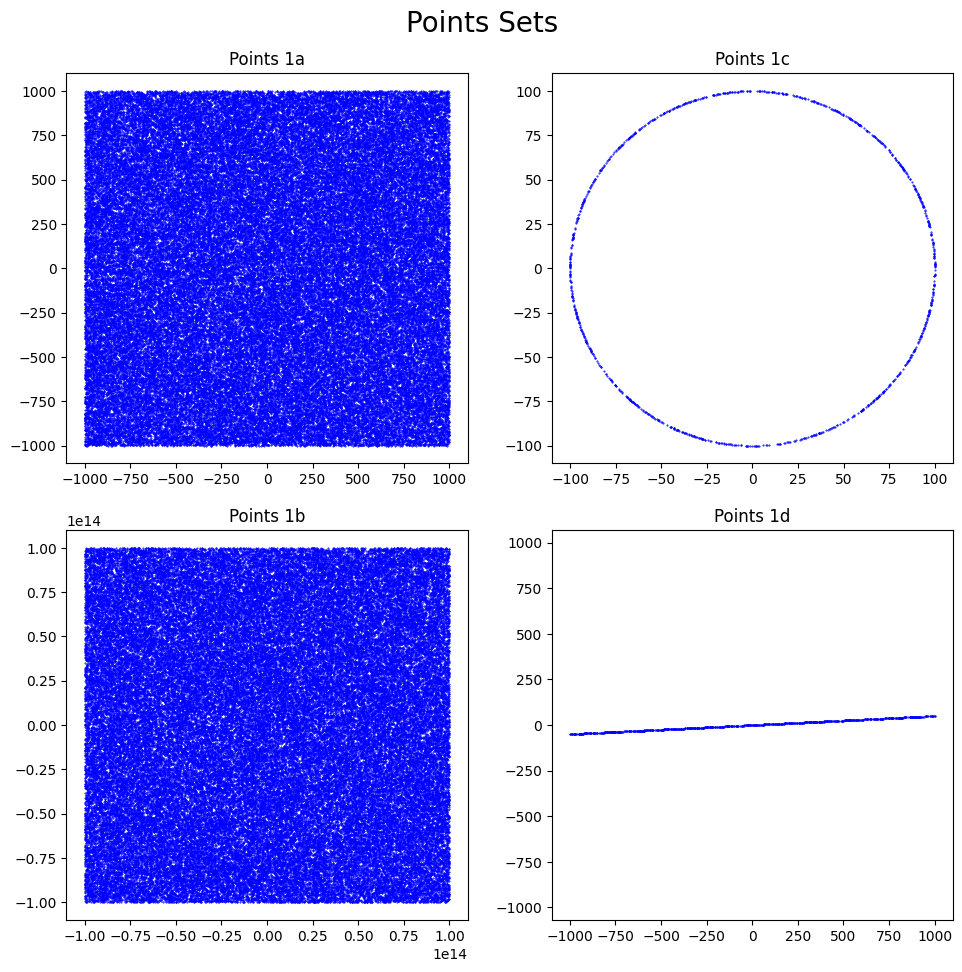

Generating data took: 0.004s.


In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import math
import time

random.seed(1)
matplotlib.rcParams['figure.figsize'] = [10, 10]

data = []
generation_start = time.time()
# generating 1a
data.append(np.random.uniform(-1000, 1000, [10**5, 2]))

# generating 1b
data.append(np.random.uniform(-10**14, 10**14, [10**5, 2]))

# generating 1c
data.append(np.array([[100*math.sin(angle),  100*math.cos(angle)]
                      for angle in np.random.uniform(0, 2*math.pi, 1000)]))

# generating 1d
a, b = [-1, 0], [1, 0.1]
m = (a[1] - b[1]) / (a[0] - b[0])
u = a[1] - m * a[0]

data.append(np.array([[x, x*m + u] for x in np.random.uniform(-1000, 1000, 1000)]))
generation_stop = time.time()

# Plotting  data
figure, axis = plt.subplots(2, 2)
plt.axis("equal")
for i, data_set in enumerate(data):
    axis[i%2, i//2].scatter(*zip(*data_set), color="blue", s=0.2)

figure.suptitle('Points Sets', fontsize=20)
figure.tight_layout(pad=2)
axis[0, 0].set_title("Points 1a")
axis[0, 1].set_title("Points 1c")
axis[1, 0].set_title("Points 1b")
axis[1, 1].set_title("Points 1d")

# plt.savefig('images/sets_vis.png', dpi=1000)
plt.show()
print(f"Generating data took: {generation_stop - generation_start :.3f}s.")

Calculating 2x2 NumPy det took: 0.03s.
Calculating 3x3 NumPy det took: 0.03s.
Calculating my 2x2 det took: 0.13s.


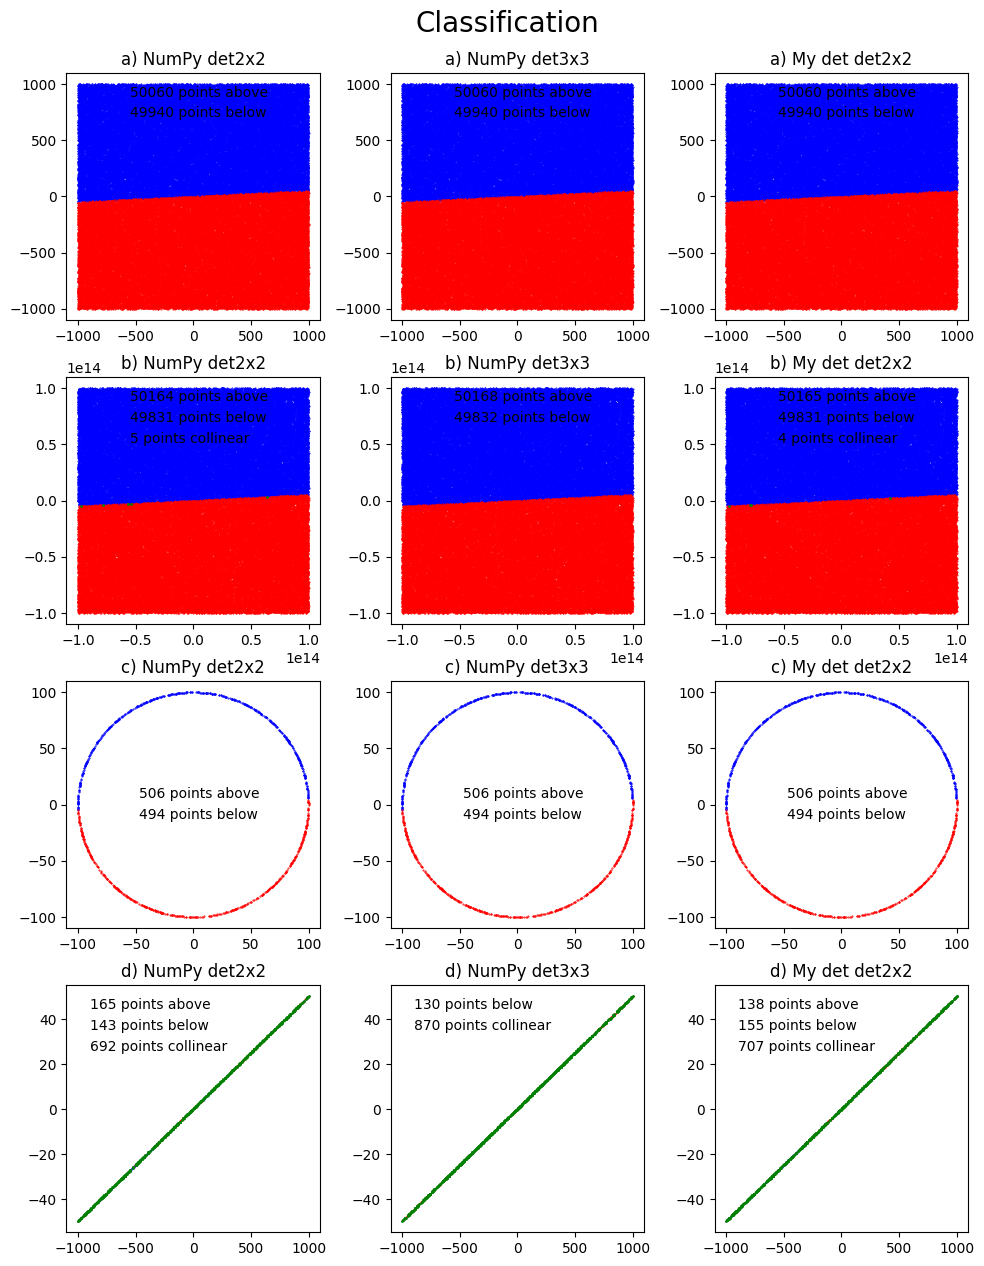

In [5]:
%matplotlib inline

# dividing sets of points in respect to line a, b
from ctypes.wintypes import POINT
import time

eps = 10**(-14)

def numpy2x2(set, a, b):
    return np.linalg.det(np.dstack((np.tile(a, (len(set), 1)) - set, np.tile(b, (len(set), 1)) - set)))

def numpy3x3(set, a, b):
    vec3_a = np.array(a + [1])
    vec3_b = np.array(b + [1])
    one = np.array([1])

    return np.linalg.det(np.dstack((np.tile(vec3_a, (len(set), 1)), np.tile(vec3_b, (len(set), 1)), np.hstack((set, np.tile(one, (len(set), 1)))))))

def my2x2(set, a, b):
    det_array = [0 for _ in range(len(set))]

    for i, point in enumerate(set):
        det_array[i] = (a[0] - point[0])*(b[1] - point[1]) - (b[0] - point[0])*(a[1] - point[1])

    return det_array

def my3x3(set, a, b):
    det_array = [0 for _ in range(len(set))]

    for i, point in enumerate(set):
        det_array[i] = a[0]*b[1] + a[1]*point[0] + b[0]*point[1] - (b[1]*point[0] + a[0]*point[1] + a[1]*b[0])
    
    return det_array


matplotlib.rcParams['figure.figsize'] = [10, 13]
matplotlib.rcParams['legend.handlelength'] = 0
figure, axis = plt.subplots(4, 3)
figure.suptitle('Classification', fontsize=20)
figure.tight_layout(pad=2)

for det_method in range(3):

    det_data = []

    # 2x2 det numpy
    if det_method == 0:
        
        start = time.time()

        for point_set in data:
            det_data.append(numpy2x2(point_set, a, b))
        
        end = time.time()
        print(f"Calculating 2x2 NumPy det took: {end - start :.2f}s.")
        
    
    # 3x3 numpy
    if det_method == 1:
        
        start = time.time()

        for point_set in data:
            det_data.append(numpy3x3(point_set, a, b))
        
        end = time.time()
        print(f"Calculating 3x3 NumPy det took: {end - start :.2f}s.")
        
    
    # my 2x2 det implementation
    if det_method == 2:
        
        start = time.time()

        for point_set in data:
            det_data.append(my2x2(point_set, a, b))
        
        end = time.time()
        print(f"Calculating my 2x2 det took: {end - start :.2f}s.")

    # plotting function
    for i, point_set in enumerate(data):
        points_above = []
        points_on = []
        points_below = []
        for j, point in enumerate(point_set):
            if abs(det_data[i][j]) <= eps:
                points_on.append(point)
            elif det_data[i][j] < 0:
                points_below.append(point)
            else:
                points_above.append(point)
        
        # handling labels
        handle_labels = []
        if len(points_above) > 0:
            axis[i, det_method].scatter(*zip(*points_above), color="blue", s=0.2)
            blue = mpatches.Patch(alpha = 0, label=f"{len(points_above)} points above")
            handle_labels.append(blue)
        if len(points_below) > 0:         
            axis[i, det_method].scatter(*zip(*points_below), color="red", s=0.2)
            red = mpatches.Patch(alpha = 0, label=f"{len(points_below)} points below")
            handle_labels.append(red)
        if len(points_on) > 0:
            axis[i, det_method].scatter(*zip(*points_on), color="green", s=1)
            green = mpatches.Patch(alpha = 0, label=f"{len(points_on)} points collinear")
            handle_labels.append(green)


        # handling legends
        axis[i, det_method].legend(handles=handle_labels, loc=9, frameon=False)
        if i == 2:
            axis[i, det_method].legend(handles=handle_labels, loc=10, frameon=False)
        if i == 3:
            axis[i, det_method].legend(handles=handle_labels, loc="upper left", frameon=False)
        
    
        
        
axis[0, 0].set_title("a) NumPy det2x2")
axis[0, 1].set_title("a) NumPy det3x3")
axis[0, 2].set_title("a) My det det2x2")
axis[1, 0].set_title("b) NumPy det2x2")
axis[1, 1].set_title("b) NumPy det3x3")
axis[1, 2].set_title("b) My det det2x2")
axis[2, 0].set_title("c) NumPy det2x2")
axis[2, 1].set_title("c) NumPy det3x3")
axis[2, 2].set_title("c) My det det2x2")
axis[3, 0].set_title("d) NumPy det2x2")
axis[3, 1].set_title("d) NumPy det3x3")
axis[3, 2].set_title("d) My det det2x2")

# plt.savefig('images/line.png', dpi=1000)
plt.show()
        
    

In [6]:
# checking different eps values
eps_tab = [10**(-2), 10**(-5), 10**(-8), 10**(-11), 10**(-14)]
set_names = ["A", "B", "C", "D"]

for eps in eps_tab:
    print("FOR EPS = ", eps, ", we get:", sep="") 

    for det_method in range(4):

        det_data = []

        # numpy 2x2
        if det_method == 0:
            
            print("NumPy2x2")
            for point_set in data:
                det_data.append(numpy2x2(point_set, a, b))
        
        # numpy 3x3
        elif det_method == 1:

            print("NumPy3x3")
            for point_set in data:
                det_data.append(numpy3x3(point_set, a, b))

        # my 2x2 det
        elif det_method == 2:

            print("My2x2")
            for point_set in data:
                det_data.append(my2x2(point_set, a, b))

        # my 3x3 det
        elif det_method == 3:

            print("My3x3")
            for point_set in data:
                det_data.append(my3x3(point_set, a, b))
        
        for i, det_array in enumerate(det_data):
            points_above_count = points_on_count = points_below_count = 0

            for det_val in det_array:
                if abs(det_val) <= eps:
                    points_on_count += 1
                elif det_val < 0:
                    points_below_count += 1
                else:
                    points_above_count += 1
            
            print(set_names[i], ": ", points_above_count, points_on_count, points_below_count)
    

FOR EPS = 0.01, we get:
NumPy2x2
A :  50060 0 49940
B :  50164 5 49831
C :  506 0 494
D :  0 1000 0
NumPy3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
My2x2
A :  50060 0 49940
B :  50165 4 49831
C :  506 0 494
D :  0 1000 0
My3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
FOR EPS = 1e-05, we get:
NumPy2x2
A :  50060 0 49940
B :  50164 5 49831
C :  506 0 494
D :  0 1000 0
NumPy3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
My2x2
A :  50060 0 49940
B :  50165 4 49831
C :  506 0 494
D :  0 1000 0
My3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
FOR EPS = 1e-08, we get:
NumPy2x2
A :  50060 0 49940
B :  50164 5 49831
C :  506 0 494
D :  0 1000 0
NumPy3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
My2x2
A :  50060 0 49940
B :  50165 4 49831
C :  506 0 494
D :  0 1000 0
My3x3
A :  50060 0 49940
B :  50168 0 49832
C :  506 0 494
D :  0 1000 0
FOR EPS = 1e-11, we get:
NumPy2x